# <center> Supplementary Paper figures </center>

In [1]:
import sys
sys.path.append("../")
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from Linearity import Neuron
import scipy.stats as ss
plt.style.use('neuron_color')
from pickle import dump
import os

In [2]:
def simpleaxis(axes, every=False, outward=False):
    if not isinstance(axes, (list, np.ndarray)):
        axes = np.array([axes])
    for ax in np.array(axes).flatten():
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if (outward):
            ax.spines['bottom'].set_position(('outward', 10))
            ax.spines['left'].set_position(('outward', 10))
        if every:
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_title('')

## One square distributions of Control and GABAzine are similar, while two square onwards starts to diverge.

In [3]:
#fileList = glob.glob("/media/sahil/NCBS_Shares_BGStim/patch_data/**/c?/plots/*.pkl")
neuronList = []
prefix = '/home/bhalla/Documents/Codes/data'
with open(prefix + "/media/sahil/NCBS_Shares_BGStim/patch_data/current_clamp_files_with_GABAzine.txt", 'r') as fp:
    fileList = fp.read().splitlines()
    for i,filename in enumerate(fileList):
        fileList[i] += "plots/" + filename.split('/')[-2] + ".pkl"
        try:
            print ("Reading ", prefix + fileList[i])
            neuronList.append(Neuron.load(prefix + fileList[i]))
        except:
            print ("Couldn't read", prefix + fileList[i])
print ("Read {} files.".format(len(fileList)))

Reading  /home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/160817/c4/plots/c4.pkl
Reading  /home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/160830/c1/plots/c1.pkl
Reading  /home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/160920/c1/plots/c1.pkl
Reading  /home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/160927/c5/plots/c5.pkl
Reading  /home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/160928/c4/plots/c4.pkl
Reading  /home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/161013/c1/plots/c1.pkl
Reading  /home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/161027/c3/plots/c3.pkl
Reading  /home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/161117/c1/plots/c1.pkl
Reading  /home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/161228/c1/plots/c1.pkl
Reading  /home/bhalla/Docume

In [4]:
def figure2(feature=0, square=1):
    ''' Looking at the one square distribution for GABAzine and Control'''
                        
    numNeurons = 0
    control_vmax = []
    gabazine_vmax = []
    
    for neuron in neuronList:
        if len(neuron.experiment)>1:
            try:
                control_trials = neuron.experiment["Control"][square].trial
                gabazine_trials = neuron.experiment["GABAzine"][square].trial
                for trial in control_trials:
                    try:
                        control_vmax.append(control_trials[trial].feature[feature])
                    except:
                        print ("trial didn't work", trial)
                for trial in gabazine_trials:
                    try:
                        gabazine_vmax.append(gabazine_trials[trial].feature[feature])
                    except:
                        print ("trial didn't work", trial)
            except:
                print (square, "square not found in either or both in ", neuron.date, neuron.index)
    
    rangeMin = min(min(control_vmax), min(gabazine_vmax))
    rangeMax = max(max(control_vmax), max(gabazine_vmax))
    bins = np.linspace(rangeMin, rangeMax, 30)
    fig, ax = plt.subplots()
    ax.hist(control_vmax, bins=bins, label="Control",  color='gray',histtype='step')
    ax.hist(gabazine_vmax, bins=bins, label="GABAzine", color='red',histtype='step')
    ax.set_title("Comparing one square distributions for Control and GABAzine")
    ax.set_xlabel("PSP Amplitude (mV)")
    ax.set_ylabel("# recorded PSPs")
    simpleaxis(ax)
    fig.set_figwidth(1.5)
    fig.set_figheight(1.5)
    plt.legend()
    dump(fig,file('figures/supplementary/2_{}.pkl'.format(square),'wb'))
    plt.show()
    print(len(control_vmax), len(gabazine_vmax))
    return control_vmax, gabazine_vmax

trial didn't work 5
trial didn't work 7
trial didn't work 9
trial didn't work 13
trial didn't work 31
trial didn't work 35
trial didn't work 37
trial didn't work 53
trial didn't work 59
trial didn't work 61
trial didn't work 85
trial didn't work 7
trial didn't work 13
trial didn't work 31
trial didn't work 37
trial didn't work 55
trial didn't work 59
trial didn't work 61
trial didn't work 26
trial didn't work 45
trial didn't work 55
trial didn't work 63
trial didn't work 106


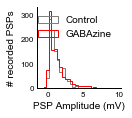

1092 1173
trial didn't work 5
trial didn't work 7
trial didn't work 9
trial didn't work 13
trial didn't work 31
trial didn't work 35
trial didn't work 37
trial didn't work 53
trial didn't work 59
trial didn't work 61
trial didn't work 85
trial didn't work 7
trial didn't work 13
trial didn't work 31
trial didn't work 37
trial didn't work 55
trial didn't work 59
trial didn't work 61
trial didn't work 26
trial didn't work 45
trial didn't work 55
trial didn't work 63
trial didn't work 106


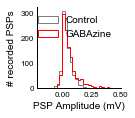

1092 1173
trial didn't work 5
trial didn't work 7
trial didn't work 9
trial didn't work 13
trial didn't work 31
trial didn't work 35
trial didn't work 37
trial didn't work 53
trial didn't work 59
trial didn't work 61
trial didn't work 85
trial didn't work 7
trial didn't work 13
trial didn't work 31
trial didn't work 37
trial didn't work 55
trial didn't work 59
trial didn't work 61
trial didn't work 26
trial didn't work 45
trial didn't work 55
trial didn't work 63
trial didn't work 106


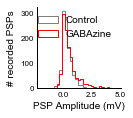

1092 1173
trial didn't work 5
trial didn't work 7
trial didn't work 9
trial didn't work 13
trial didn't work 31
trial didn't work 35
trial didn't work 37
trial didn't work 53
trial didn't work 59
trial didn't work 61
trial didn't work 85
trial didn't work 7
trial didn't work 13
trial didn't work 31
trial didn't work 37
trial didn't work 55
trial didn't work 59
trial didn't work 61
trial didn't work 26
trial didn't work 45
trial didn't work 55
trial didn't work 63
trial didn't work 106


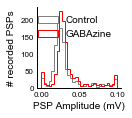

1092 1173
trial didn't work 5
trial didn't work 7
trial didn't work 9
trial didn't work 13
trial didn't work 31
trial didn't work 35
trial didn't work 37
trial didn't work 53
trial didn't work 59
trial didn't work 61
trial didn't work 85
trial didn't work 7
trial didn't work 13
trial didn't work 31
trial didn't work 37
trial didn't work 55
trial didn't work 59
trial didn't work 61
trial didn't work 26
trial didn't work 45
trial didn't work 55
trial didn't work 63
trial didn't work 106


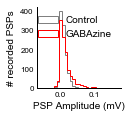

1092 1173
trial didn't work 5
trial didn't work 7
trial didn't work 9
trial didn't work 13
trial didn't work 31
trial didn't work 35
trial didn't work 37
trial didn't work 53
trial didn't work 59
trial didn't work 61
trial didn't work 85
trial didn't work 7
trial didn't work 13
trial didn't work 31
trial didn't work 37
trial didn't work 55
trial didn't work 59
trial didn't work 61
trial didn't work 26
trial didn't work 45
trial didn't work 55
trial didn't work 63
trial didn't work 106


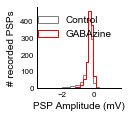

1092 1173
trial didn't work 5
trial didn't work 7
trial didn't work 9
trial didn't work 13
trial didn't work 31
trial didn't work 35
trial didn't work 37
trial didn't work 53
trial didn't work 59
trial didn't work 61
trial didn't work 85
trial didn't work 7
trial didn't work 13
trial didn't work 31
trial didn't work 37
trial didn't work 55
trial didn't work 59
trial didn't work 61
trial didn't work 26
trial didn't work 45
trial didn't work 55
trial didn't work 63
trial didn't work 106


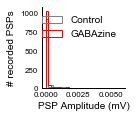

1092 1173


In [5]:
for feature in range(7):
    c, g = figure2(square=1, feature=feature)

In [6]:
neuronList[0].features

{0: 'epsp_max',
 1: 'epsp_area',
 2: 'epsp_avg',
 3: 'epsp_time_to_peak',
 4: 'epsp_area_to_peak',
 5: 'epsp_min',
 6: 'epsp_onset'}

In [7]:
print(np.var(c, ddof=1), np.mean(c), np.var(g, ddof=1), np.mean(g))
n, bins = np.histogram(g,bins=100)
print(np.median(g))
print(ss.lognorm.fit(g, fscale=np.median(g)))

print(np.var(c, ddof=1), np.mean(c), np.var(g, ddof=1), np.mean(g))
n, bins = np.histogram(c,bins=100)
print(np.median(c))
print(ss.lognorm.fit(c, fscale=np.median(c)))

2.521137205675473e-07 0.00017385531135531135 1.7684263607505622e-07 0.00011926683716965046
0.0
(1.0, -0.00020140520026913975, 0.0)
2.521137205675473e-07 0.00017385531135531135 1.7684263607505622e-07 0.00011926683716965046
0.0
(1.0, -0.00020901535862166305, 0.0)


/usr/local/lib/python2.7/dist-packages/scipy/optimize/optimize.py:543: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


In [8]:
n, bins

(array([887,  11,  12,  10,   9,   5,   5,   4,  15,   8,   9,  10,   5,
          6,   6,   2,   3,   7,   4,   7,   2,   5,   4,   2,   1,   2,
          2,   6,   7,   1,   2,   3,   0,   2,   1,   1,   2,   2,   3,
          1,   1,   2,   2,   1,   1,   1,   1,   0,   0,   1,   1,   0,
          0,   1,   0,   0,   0,   0,   1,   0,   0,   0,   0,   1,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   1]),
 array([0.000e+00, 5.100e-05, 1.020e-04, 1.530e-04, 2.040e-04, 2.550e-04,
        3.060e-04, 3.570e-04, 4.080e-04, 4.590e-04, 5.100e-04, 5.610e-04,
        6.120e-04, 6.630e-04, 7.140e-04, 7.650e-04, 8.160e-04, 8.670e-04,
        9.180e-04, 9.690e-04, 1.020e-03, 1.071e-03, 1.122e-03, 1.173e-03,
        1.224e-03, 1.275e-03, 1.326e-03, 1.377e-03, 1.428e-03, 1.479e-03,
        1.530e-03, 1.581e-03, 1.632e-03, 1.683e-03, 1.734e-03, 1

In [9]:
?ss.lognorm.fit

|Sq num|C_var|C_mean|G_var|G_mean|
|----|----|----|----|-----|
|1|0.8545850409488629 |1.151996055161383 |2.170838059275216 |1.4204768821911005|
|2|2.0089464925142595 |1.9930293791179101 |4.333277125877969 |2.669277622854819|
|3|2.3710840651933167 |2.525231743863857 |5.518800076298463 |3.570808533457798|
|5|3.770729716081392 |3.0680340604357026 |6.778870045071278 |4.124148356004597|
|7|5.703181417691025 |3.6109601237044955 |5.6260328700008015 |4.586416713995049|
|9|0.9795477534698871 | 1.7217867593384926 |3.2567437190490516 |6.894163377128345|

In [10]:
'''
a = 

[1.4204768821911005, 2.669277622854819, 3.570808533457798, 4.124148356004597, 4.586416713995049, 6.894163377128345]

[2.170838059275216, ]
1	0.8545850409488629	1.151996055161383	2.170838059275216	1.4204768821911005
2	2.0089464925142595	1.9930293791179101	4.333277125877969	2.669277622854819
3	2.3710840651933167	2.525231743863857	5.518800076298463	3.570808533457798
5	3.770729716081392	3.0680340604357026	6.778870045071278	4.124148356004597
7	5.703181417691025	3.6109601237044955	5.6260328700008015	4.586416713995049
9	0.9795477534698871	1.7217867593384926	3.2567437190490516	6.894163377128345

'''




SyntaxError: invalid syntax (<ipython-input-10-ef9c212d53aa>, line 1)

trial didn't work 5
trial didn't work 7
trial didn't work 9
trial didn't work 13
trial didn't work 31
trial didn't work 35
trial didn't work 37
trial didn't work 53
trial didn't work 59
trial didn't work 61
trial didn't work 85
trial didn't work 7
trial didn't work 13
trial didn't work 31
trial didn't work 37
trial didn't work 55
trial didn't work 59
trial didn't work 61
trial didn't work 26
trial didn't work 45
trial didn't work 55
trial didn't work 63
trial didn't work 106


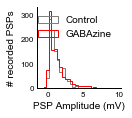

1092 1173
2 square not found in either or both in  160830 c1
trial didn't work 7
trial didn't work 15
trial didn't work 16
trial didn't work 24
trial didn't work 39
trial didn't work 63
trial didn't work 77
trial didn't work 2
trial didn't work 4
trial didn't work 6
trial didn't work 7
trial didn't work 9
trial didn't work 15
trial didn't work 17
trial didn't work 18
trial didn't work 22
trial didn't work 23
trial didn't work 24
trial didn't work 25
trial didn't work 26
trial didn't work 28
trial didn't work 30
trial didn't work 31
trial didn't work 32
trial didn't work 36
trial didn't work 39
trial didn't work 41
trial didn't work 42
trial didn't work 52
trial didn't work 54
trial didn't work 55
trial didn't work 56
trial didn't work 57
trial didn't work 59
trial didn't work 62
trial didn't work 63
trial didn't work 68
trial didn't work 70
trial didn't work 5
trial didn't work 16
trial didn't work 29
trial didn't work 39
trial didn't work 53
trial didn't work 55
trial didn't work 63
t

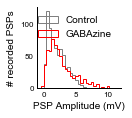

690 638
3 square not found in either or both in  160830 c1
3 square not found in either or both in  160927 c5
3 square not found in either or both in  160928 c4
trial didn't work 3
trial didn't work 4
trial didn't work 5
trial didn't work 6
trial didn't work 8
trial didn't work 10
trial didn't work 11
trial didn't work 12
trial didn't work 13
trial didn't work 15
trial didn't work 16
trial didn't work 17
trial didn't work 18
trial didn't work 19
trial didn't work 24
trial didn't work 25
trial didn't work 27
trial didn't work 28
trial didn't work 29
trial didn't work 31
trial didn't work 32
trial didn't work 34
trial didn't work 35
trial didn't work 36
trial didn't work 37
trial didn't work 39
trial didn't work 41
trial didn't work 42
trial didn't work 45
trial didn't work 46
trial didn't work 48
trial didn't work 49
trial didn't work 50
trial didn't work 51
trial didn't work 52
trial didn't work 53
trial didn't work 54
trial didn't work 58
trial didn't work 59
trial didn't work 60
tria

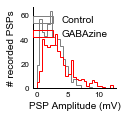

510 432
trial didn't work 1
trial didn't work 5
trial didn't work 7
trial didn't work 10
trial didn't work 12
trial didn't work 14
trial didn't work 17
trial didn't work 19
trial didn't work 23
trial didn't work 24
trial didn't work 25
trial didn't work 27
trial didn't work 29
trial didn't work 32
trial didn't work 34
trial didn't work 37
trial didn't work 38
trial didn't work 39
trial didn't work 40
trial didn't work 41
trial didn't work 43
trial didn't work 45
trial didn't work 46
trial didn't work 48
trial didn't work 50
trial didn't work 51
trial didn't work 54
trial didn't work 55
trial didn't work 56
trial didn't work 57
trial didn't work 58
trial didn't work 62
trial didn't work 63
trial didn't work 64
trial didn't work 66
trial didn't work 67
trial didn't work 72
trial didn't work 1
trial didn't work 2
trial didn't work 3
trial didn't work 5
trial didn't work 6
trial didn't work 7
trial didn't work 8
trial didn't work 9
trial didn't work 10
trial didn't work 12
trial didn't wor

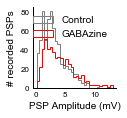

700 541
7 square not found in either or both in  160830 c1
7 square not found in either or both in  160927 c5
7 square not found in either or both in  160928 c4
trial didn't work 49
trial didn't work 53
trial didn't work 1
trial didn't work 2
trial didn't work 3
trial didn't work 4
trial didn't work 5
trial didn't work 6
trial didn't work 7
trial didn't work 8
trial didn't work 9
trial didn't work 10
trial didn't work 11
trial didn't work 12
trial didn't work 13
trial didn't work 14
trial didn't work 15
trial didn't work 16
trial didn't work 17
trial didn't work 18
trial didn't work 19
trial didn't work 20
trial didn't work 21
trial didn't work 22
trial didn't work 23
trial didn't work 24
trial didn't work 25
trial didn't work 26
trial didn't work 27
trial didn't work 28
trial didn't work 29
trial didn't work 30
trial didn't work 31
trial didn't work 32
trial didn't work 33
trial didn't work 34
trial didn't work 35
trial didn't work 36
trial didn't work 37
trial didn't work 38
trial di

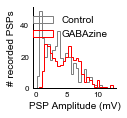

402 331
9 square not found in either or both in  160830 c1
9 square not found in either or both in  160920 c1
9 square not found in either or both in  160927 c5
9 square not found in either or both in  160928 c4
9 square not found in either or both in  161027 c3
9 square not found in either or both in  161228 c1
9 square not found in either or both in  170222 c2
9 square not found in either or both in  170303 c1


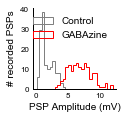

142 144


([2.7292375959532555,
  1.064970152956076,
  2.3457450955422967,
  1.449751341212538,
  2.1341115035559124,
  2.806314080183627,
  1.9924012519844292,
  2.6843226469150743,
  2.40393799575237,
  3.5225619994386825,
  4.239380238592754,
  3.822818310844098,
  3.7784222029676844,
  3.6289933187982624,
  3.051328623301727,
  2.6512520068845298,
  4.030212832839446,
  2.7399220271063265,
  2.8271401953032584,
  3.086359314673967,
  2.2988902522639063,
  2.286550200279733,
  3.4259508803952774,
  2.214429840926153,
  4.000119038249872,
  2.6742275491353564,
  2.4421401127110074,
  3.0325947398948068,
  2.0977081576882233,
  2.908636066948548,
  1.593368822222366,
  3.7683154261949183,
  2.737414983300081,
  2.11401132790582,
  2.108044884426344,
  2.258718352720708,
  3.2964604320325175,
  2.201011917047464,
  3.2662672506707233,
  2.125600722935681,
  3.156125591564644,
  3.2506812153888327,
  1.5110971263059705,
  1.9317784020089266,
  2.808852679420549,
  2.5188195591203226,
  3.23002281

In [11]:
figure2(square=1)
figure2(square=2)
figure2(square=3)
figure2(square=5)
figure2(square=7)
figure2(square=9)

In [12]:
def figure_appeal(feature=0, square=1):
    ''' Looking at the one square distribution for GABAzine and Control'''
                        
    numNeurons = 0
    control_atp = []
    control_aap = []
    gabazine_atp = []
    gabazine_aap = []
    
    for neuron in neuronList:
            try:
                control_trials = neuron.experiment["Control"][square].trial
                gabazine_trials = neuron.experiment["GABAzine"][square].trial
                for trial in control_trials:
                    try:
                        control_atp.append(control_trials[trial].feature[4])
                        control_aap.append(control_trials[trial].feature[1] - control_trials[trial].feature[4])
                    except:
                        print ("trial didn't work", trial)
                for trial in gabazine_trials:
                    try:
                        gabazine_atp.append(gabazine_trials[trial].feature[4])
                        gabazine_aap.append(gabazine_trials[trial].feature[1] - gabazine_trials[trial].feature[4])
                    except:
                        print ("trial didn't work", trial)
            except:
                print (square, "square not found in either or both in ", neuron.date, neuron.index)
    
#     rangeMin = min(min(control_atp), min(gabazine_vmax))
#     rangeMax = max(max(control_vmax), max(gabazine_vmax))
#     bins = np.linspace(rangeMin, rangeMax, 30)
    bins = 50
    fig, ax = plt.subplots(ncols=2)
    ax[0].hist(control_atp, bins=bins, label="Control",  color='gray',histtype='step', cumulative=True, density=True)
    ax[0].hist(gabazine_atp, bins=bins, label="GABAzine", color='red',histtype='step', cumulative=True, density=True)
    ax[1].hist(control_aap, bins=bins, label="Control",  color='gray',histtype='step', cumulative=True, density=True)
    ax[1].hist(gabazine_aap, bins=bins, label="GABAzine", color='red',histtype='step', cumulative=True, density=True)

#     fig.set_title("Comparing one square distributions for Control and GABAzine")
    ax[0].set_xlabel("PSP Area to peak (mV)")
    ax[1].set_xlabel("PSP Are (mV)")
    ax[0].set_ylabel("# recorded PSPs")
    simpleaxis(ax)
    fig.set_figwidth(3)
    fig.set_figheight(1.5)
#     plt.legend()
#     dump(fig,file('figures/supplementary/2_{}.pkl'.format(square),'wb'))
    plt.show()
#     print(len(control_vmax), len(gabazine_vmax))
    return control_atp, gabazine_atp, control_aap, gabazine_aap

1 square not found in either or both in  160817 c4
trial didn't work 5
trial didn't work 7
trial didn't work 9
trial didn't work 13
trial didn't work 31
trial didn't work 35
trial didn't work 37
trial didn't work 53
trial didn't work 59
trial didn't work 61
trial didn't work 85
trial didn't work 7
trial didn't work 13
trial didn't work 31
trial didn't work 37
trial didn't work 55
trial didn't work 59
trial didn't work 61
trial didn't work 26
trial didn't work 45
trial didn't work 55
trial didn't work 63
trial didn't work 106


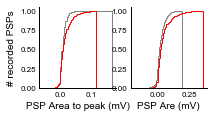

1092 1173 1092 1173
Ks_2sampResult(statistic=0.15845535538630162, pvalue=6.887890257465839e-13)
Ks_2sampResult(statistic=0.11411521130191205, pvalue=6.872920139566875e-07)


In [13]:
arrs = figure_appeal()
print (len(arrs[0]),len(arrs[1]),len(arrs[2]),len(arrs[3]))
print(ss.ks_2samp(arrs[0], arrs[1]))
print(ss.ks_2samp(arrs[2], arrs[3]))

In [14]:
def figure_appeal_pair(feature=0, square=1):
    ''' Looking at the one square distribution for GABAzine and Control'''
                        
    numNeurons = 0
    control_atp = []
    control_aap = []
    gabazine_atp = []
    gabazine_aap = []
    
    for neuron in neuronList:
        if ( ('Control' in neuron.experiment) and ('GABAzine' in neuron.experiment)):
            control_coords = neuron.experiment["Control"][square].coords
            gabazine_coords = neuron.experiment["GABAzine"][square].coords
            commonCoords = set(neuron.experiment["Control"][1].coords.values()).intersection(set(neuron.experiment["GABAzine"][1].coords.values()))
            for coord in commonCoords:
                if 0.2 < neuron.experiment["GABAzine"][square].coordwise[coord].average_feature[0] < 2:
                    control_atp.append(neuron.experiment["Control"][square].coordwise[coord].average_feature[4])
                    control_aap.append(neuron.experiment["Control"][square].coordwise[coord].average_feature[1] - neuron.experiment["Control"][square].coordwise[coord].average_feature[4])
                    gabazine_atp.append(neuron.experiment["GABAzine"][square].coordwise[coord].average_feature[4])
                    gabazine_aap.append(neuron.experiment["GABAzine"][square].coordwise[coord].average_feature[1] - neuron.experiment["GABAzine"][square].coordwise[coord].average_feature[4])
        else:
            print ("Nothing here")
#             except:
#                 print (square, "square not found in either or both in ", neuron.date, neuron.index)
    
    print (len(control_atp), len(gabazine_atp), len(control_aap), len(gabazine_aap))
    bins = 5
    fig, ax = plt.subplots(ncols=2)
    ax[0].scatter(control_atp, gabazine_atp, s=4)
    ax[1].scatter(control_aap, gabazine_aap, s=4)
    
    minLim, maxLim = np.nanmin(np.concatenate([control_atp, gabazine_atp])), np.nanmax(np.concatenate([control_atp, gabazine_atp]))
    ax[0].set_xlim((minLim, maxLim))
    ax[0].set_ylim((minLim, maxLim))
    ax[0].plot(ax[0].get_xlim(), ax[0].get_ylim(), ls="--", c=".3")
    ax[0].set_xlabel("Control_ATP")
    ax[0].set_ylabel("GABAzine_ATP")
    
    minLim, maxLim = np.nanmin(np.concatenate([control_aap, gabazine_aap])), np.nanmax(np.concatenate([control_aap, gabazine_aap]))
    ax[1].set_xlim((minLim, maxLim))
    ax[1].set_ylim((minLim, maxLim))
    ax[1].plot(ax[1].get_xlim(), ax[1].get_ylim(), ls="--", c=".3")
    ax[1].set_xlabel("Control_AAP")
    ax[1].set_ylabel("GABAzine_AAP")
    
    simpleaxis(ax)
#     plt.show()
#     ax[0].hist(control_atp, bins=bins)#, label="Control",  color='gray',histtype='step', cumulative=True, density=True)     ax[0].hist(gabazine_atp, bins=bins, label="GABAzine", color='red',histtype='step', cumulative=True, density=True)
#     ax[1].hist(control_aap, bins=bins, label="Control",  color='gray',histtype='step', cumulative=True, density=True)
#     ax[1].hist(gabazine_aap, bins=bins, label="GABAzine", color='red',histtype='step', cumulative=True, density=True)

#     fig.set_title("Comparing one square distributions for Control and GABAzine")
#     ax[0].set_xlabel("PSP Area to peak (mV)")
#     ax[1].set_xlabel("PSP Are (mV)")
#     ax[0].set_ylabel("# recorded PSPs")
#     simpleaxis(ax)
    fig.set_figwidth(3)
    fig.set_figheight(1.5)
# #     plt.legend()
# #     dump(fig,file('figures/supplementary/2_{}.pkl'.format(square),'wb'))
    plt.show()
#     print(len(control_vmax), len(gabazine_vmax))

    control_atp, gabazine_atp, control_aap, gabazine_aap = [np.array(x) for x in [control_atp, gabazine_atp, control_aap, gabazine_aap]]

    atp_ratio = control_atp/gabazine_atp
    atp_ratio = atp_ratio[~np.isnan(atp_ratio)]
    aap_ratio = control_aap/gabazine_aap
    aap_ratio = aap_ratio[~np.isnan(aap_ratio)]

#     print(zip(atp_ratio, aap_ratio))
    fig, ax = plt.subplots()
    ax.hist(atp_ratio, bins=10000, label="ATP", color='gray',histtype='step', cumulative=True, density=True)
    ax.hist(aap_ratio, bins=10000, label="AAP", color='orange',histtype='step', cumulative=True, density=True)
    ax.vlines(x=1, ymin=0, ymax=1, linestyle='--')
    ax.set_xlim((-3,6))
    simpleaxis(ax)
    plt.legend()
    plt.show()
    return control_atp, gabazine_atp, control_aap, gabazine_aap

Nothing here
338 338 338 338


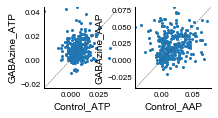

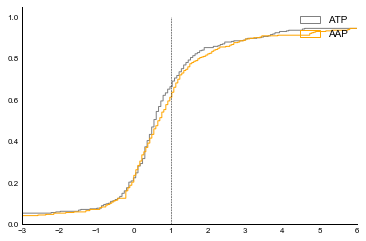

In [15]:
appeal_paired = figure_appeal_pair()

In [86]:
def figure_appeal_pair_traces(square=1):
    ''' Looking at the one square distribution for GABAzine and Control'''
                        
    numNeurons = 0
    control_atp = []
    control_aap = []
    gabazine_atp = []
    gabazine_aap = []
    
    fig, ax = plt.subplots()
    for neuron in neuronList:
        fig, ax = plt.subplots(ncols=2)
        if ( ('Control' in neuron.experiment) and ('GABAzine' in neuron.experiment)):
            control_coords = neuron.experiment["Control"][square].coords
            gabazine_coords = neuron.experiment["GABAzine"][square].coords
            commonCoords = set(neuron.experiment["Control"][1].coords.values()).intersection(set(neuron.experiment["GABAzine"][1].coords.values()))
            for coord in commonCoords:
                if 0.2 < neuron.experiment["GABAzine"][square].coordwise[coord].average_feature[0] < 2:
                    numTrials = len(neuron.experiment["Control"][square].coordwise[coord].trials)
                    control_trace = np.average([neuron.experiment["Control"][square].coordwise[coord].trials[j].interestWindow for j in range(numTrials)],axis=0)
                    numTrials = len(neuron.experiment["GABAzine"][square].coordwise[coord].trials)
                    gabazine_trace = np.average([neuron.experiment["GABAzine"][square].coordwise[coord].trials[j].interestWindow for j in range(numTrials)],axis=0)
#                     print(len(gabazine_trace))
                    ax[0].plot(np.arange(2000), np.diff(control_trace), linewidth=1)
                    ax[1].plot(np.arange(2000), np.diff(gabazine_trace), linewidth=1)
#                     ax[1].plot(control_trace[500:1500], gabazine_trace[500:1500], linewidth=1)
#                     ax[2].plot(control_trace[1000:1500], gabazine_trace[1000:1500], linewidth=1)
#                     ax[3].plot(control_trace[1500:], gabazine_trace[1500:], linewidth=1)
        else:       
            print ("Nothing here")
#             except:
#                 print (square, "square not found in either or both in ", neuron.date, neuron.index)
    
    
        simpleaxis(ax)
    #     plt.show()
    #     ax[0].hist(control_atp, bins=bins)#, label="Control",  color='gray',histtype='step', cumulative=True, density=True)     ax[0].hist(gabazine_atp, bins=bins, label="GABAzine", color='red',histtype='step', cumulative=True, density=True)
    #     ax[1].hist(control_aap, bins=bins, label="Control",  color='gray',histtype='step', cumulative=True, density=True)
    #     ax[1].hist(gabazine_aap, bins=bins, label="GABAzine", color='red',histtype='step', cumulative=True, density=True)

    #     fig.set_title("Comparing one square distributions for Control and GABAzine")
    #     ax[0].set_xlabel("PSP Area to peak (mV)")
    #     ax[1].set_xlabel("PSP Are (mV)")
    #     ax[0].set_ylabel("# recorded PSPs")
    #     simpleaxis(ax)
#         ax[0].set_xlim((-1,2.5))
        ax[0].set_ylim((-1,3))
        ax[1].set_ylim((-1,3))
#         ax[1].set_xlim((-1,2.5))
#         ax[1].set_ylim((-1,2.5))
#         ax[2].set_xlim((-1,2.5))
#         ax[2].set_ylim((-1,2.5))
#         ax[3].set_xlim((-1,2.5))
#         ax[3].set_ylim((-1,2.5))
        
#         ax[0].plot([0,1], [0,1], transform=ax[0].transAxes)
#         ax[1].plot([0,1], [0,1], transform=ax[1].transAxes)
#         ax[2].plot([0,1], [0,1], transform=ax[2].transAxes)
#         ax[3].plot([0,1], [0,1], transform=ax[3].transAxes)
        
        fig.set_figwidth(8)
        fig.set_figheight(4)
    # #     plt.legend()
    # #     dump(fig,file('figures/supplementary/2_{}.pkl'.format(square),'wb'))
        plt.show()
    #     print(len(control_vmax), len(gabazine_vmax))

Nothing here


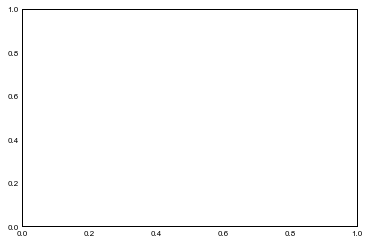

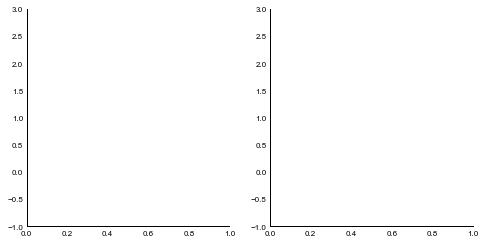

ValueError: x and y must have same first dimension, but have shapes (2000,) and (1999,)

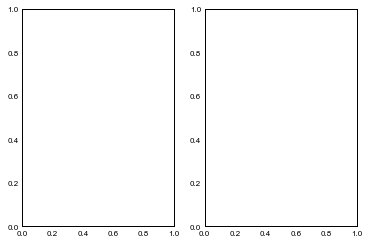

In [87]:
figure_appeal_pair_traces()

In [230]:
neuronList[0].features

{0: 'epsp_max',
 1: 'epsp_area',
 2: 'epsp_avg',
 3: 'epsp_time_to_peak',
 4: 'epsp_area_to_peak',
 5: 'epsp_min',
 6: 'epsp_onset'}

***
## Different grid maps

In [92]:
def plotPhotostimGrid(ca1_neuron, gridEdge=12, title='',colorInside=False):
    ''' Plots the photostimulation grid for the given cell'''
    coordwise = ca1_neuron.experiment["Control"][1].coordwise
    epsp_dict = np.zeros((gridEdge,gridEdge))

    for coord in coordwise:
        epsp_dict[list(coord)[0]] = coordwise[coord].average_feature[0]
    epsp_dict = np.ma.masked_where(epsp_dict == 0., epsp_dict)

    fig, ax = plt.subplots()

    # mark a specific square?
    zeros = np.zeros_like(epsp_dict)
    stim_coords = np.where(epsp_dict>0)
    zeros[stim_coords] = 1.
    c = np.ma.masked_array(zeros, zeros == 0.)  # mask squares where value == 1
    if colorInside:
        ax.pcolormesh(np.arange(gridEdge+1), np.arange(gridEdge+1), c, alpha=0.5, zorder=2, facecolor='gray', edgecolors='none',
                    cmap='gray', linewidth=1.)
    else:
        ax.pcolormesh(np.arange(gridEdge+1), np.arange(gridEdge+1), c, alpha=0.5, zorder=2, facecolor='none', edgecolors='k',
                    cmap='gray', linewidth=1.)
    ax.invert_yaxis()
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_ticks(np.arange(1,gridEdge+1), minor=True)
        axis.set(ticks=np.arange(0,gridEdge+1,2)+0.5, ticklabels=np.arange(0,gridEdge+1,2)) #Skipping square labels

    ax.grid(True, which='minor', axis='both', linestyle='--', alpha=0.1, color='k')

    ax.set_xlim((0,gridEdge+1))
    ax.set_ylim((0,gridEdge+1))

    ax.set_aspect(1)
    simpleaxis(ax, every=True, outward=False)
    ax.set_title(title)
    fig.set_figheight(2.)
    fig.set_figwidth(2.5)
    return fig

### Dense square grid (15 square edges)

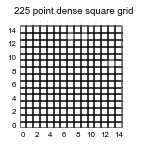

In [99]:
ca1_neuron = Neuron.load('/media/sahil/NCBS_Shares_BGStim/patch_data/150902/c2/plots/c2.pkl')
fig = plotPhotostimGrid(ca1_neuron,gridEdge=15,title='225 point dense square grid')
dump(fig,file('figures/supplementary/3_dense_225.pkl','wb'))
plt.show(fig)

### Dense square grid (13 square edges)

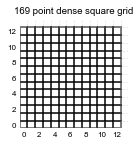

In [100]:
ca1_neuron = Neuron.load('/media/sahil/NCBS_Shares_BGStim/patch_data/160209/c4/plots/c4.pkl')
fig = plotPhotostimGrid(ca1_neuron,gridEdge=13,title='169 point dense square grid')
dump(fig,file('figures/supplementary/3_dense_169.pkl','wb'))
plt.show(fig)

### Dense circular grid (13 square edges)

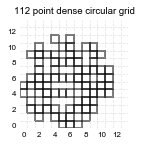

In [101]:
ca1_neuron = Neuron.load('/media/sahil/NCBS_Shares_BGStim/patch_data/160920/c1/plots/c1.pkl')
fig = plotPhotostimGrid(ca1_neuron,gridEdge=13,title='112 point dense circular grid')
dump(fig,file('figures/supplementary/3_dense_circle_112.pkl','wb'))
plt.show(fig)

### Sparse circular grid map

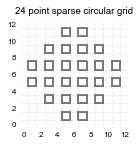

In [102]:
ca1_neuron = Neuron.load('/media/sahil/NCBS_Shares_BGStim/patch_data/161013/c1/plots/c1.pkl')
fig = plotPhotostimGrid(ca1_neuron,gridEdge=12,title='24 point sparse circular grid')
dump(fig,file('figures/supplementary/3_sparse_circle_24.pkl','wb'))
plt.show(fig)

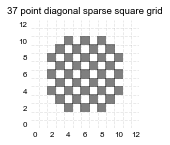

In [98]:
ca1_neuron = Neuron.load('/media/sahil/NCBS_Shares_BGStim/patch_data/170303/c1/plots/c1.pkl')
fig = plotPhotostimGrid(ca1_neuron,gridEdge=12,title='37 point diagonal sparse square grid', colorInside=True)
dump(fig,file('figures/supplementary/3_sparse_37_diagonal.pkl','wb'))
plt.show(fig)

***
## Getting kinetic parameters for conductance model

In [25]:
a = ['161220 c2_EI',
 '170510 c2_EI',
 '170524 c3_EI',
 '170524 c1_EI',
 '170530 c2_EI',
 '170530 c1_EI',
 '170531 c2_EI',
 '170531 c4_EI',
 '170531 c1_EI',
 '170720 c5_EI',
 '170720 c3_EI',
 '170720 c4_EI',
 '170720 c2_EI']
dirnames = (['/home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/' + '/'.join(j.split(' ')) + '/' for j in a])

In [26]:
dirnames

['/home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/161220/c2_EI/',
 '/home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/170510/c2_EI/',
 '/home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/170524/c3_EI/',
 '/home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/170524/c1_EI/',
 '/home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/170530/c2_EI/',
 '/home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/170530/c1_EI/',
 '/home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/170531/c2_EI/',
 '/home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/170531/c4_EI/',
 '/home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/170531/c1_EI/',
 '/home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_BGStim/patch_data/170720/c5_EI/',
 '/home/bhalla/Documents/Codes/data/media/sahil/NCBS_Shares_

In [27]:
voltageClampFiles = '/media/sahil/NCBS_Shares_BGStim/patch_data/voltage_clamp_files.txt'
with open (voltageClampFiles,'r') as r:
    dirnames = r.read().splitlines()

IOError: [Errno 2] No such file or directory: '/media/sahil/NCBS_Shares_BGStim/patch_data/voltage_clamp_files.txt'

In [28]:
neurons = []
for dirname in dirnames:
    cellIndex = dirname.split('/')[-2]
    filename = dirname + 'plots/' + cellIndex +  '_fits.pkl'
    if os.path.exists(filename):
        try:
            neurons.append(Neuron.load(filename))
        except:
            print ("Couldn't load file")
            pass

In [29]:
#Colorscheme for cells
color_cell = matplotlib.cm.plasma(np.linspace(0,1,len(dirnames)))

In [30]:
e_r, e_d, i_r, i_d, g_e, g_i, del_i = [], [], [], [], [], [], []
for index, n in enumerate(neurons):
    coord_e_r, coord_e_d, coord_i_r, coord_i_d, coord_g_e, coord_g_i, coord_e_t_0, coord_i_t_0 = {}, {}, {}, {}, {}, {}, {}, {}
    for expType, experiment in n:
        if expType == 1:
            for sqr in experiment:
                for coord in experiment[sqr].coordwise:
                    coord_e_r[coord] = []
                    coord_e_d[coord] = []
                    coord_g_e[coord] = []
                    coord_e_t_0[coord] = []
                    for trial in experiment[sqr].coordwise[coord].trials:
                        if hasattr(trial, 'fit'):
                            if not trial.fit == None:
#                                 e_r.append(trial.fit['tOn'].value)
#                                 e_d.append(trial.fit['tOff'].value)
#                                 g_e.append(trial.fit['g_max'].value)
                                coord_e_r[coord].append(trial.fit['tOn'].value)
                                coord_e_d[coord].append(trial.fit['tOff'].value)
                                coord_g_e[coord].append(trial.fit['g_max'].value)
                                coord_e_t_0[coord].append(trial.fit['t_0'].value)
                    coord_e_r[coord] = np.nanmean(coord_e_r[coord])
                    coord_e_d[coord] = np.nanmean(coord_e_d[coord])
                    coord_g_e[coord] = np.nanmean(coord_g_e[coord])
                    coord_e_t_0[coord] = np.nanmean(coord_e_t_0[coord])
        if expType == 2:
            for sqr in experiment:
                for coord in experiment[sqr].coordwise:
                    coord_i_r[coord] = []
                    coord_i_d[coord] = []
                    coord_g_i[coord] = []
                    coord_i_t_0[coord] = []
                    for trial in experiment[sqr].coordwise[coord].trials:
                        if hasattr(trial, 'fit'):
                            if not trial.fit == None:
#                                 i_r.append(trial.fit['tOn'].value)
#                                 i_d.append(trial.fit['tOff'].value)
#                                 g_i.append(trial.fit['g_max'].value)
                                coord_i_r[coord].append(trial.fit['tOn'].value)
                                coord_i_d[coord].append(trial.fit['tOff'].value)
                                coord_g_i[coord].append(trial.fit['g_max'].value)
                                coord_i_t_0[coord].append(trial.fit['t_0'].value)
                    coord_i_r[coord] = np.nanmean(coord_i_r[coord])
                    coord_i_d[coord] = np.nanmean(coord_i_d[coord])
                    coord_g_i[coord] = np.nanmean(coord_g_i[coord])
                    coord_i_t_0[coord] = np.nanmean(coord_i_t_0[coord])
        
    for coord in coord_e_r:
        if not any(np.isnan([coord_e_r[coord],coord_e_d[coord],coord_i_r[coord],coord_i_d[coord],coord_g_e[coord],coord_g_i[coord],coord_e_t_0[coord],coord_i_t_0[coord]])):
            e_r.append(coord_e_r[coord])
            e_d.append(coord_e_d[coord])
            i_r.append(coord_i_r[coord])
            i_d.append(coord_i_d[coord])
            g_e.append(coord_g_e[coord])
            g_i.append(coord_g_i[coord])
            del_i.append(coord_i_t_0[coord] - coord_e_t_0[coord])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [31]:
e_r, e_d, i_r, i_d, g_e, g_i, del_i = [np.array(x) for x in [e_r, e_d, i_r, i_d, g_e, g_i, del_i]]

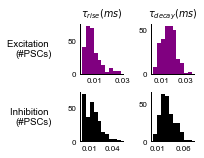

In [32]:
fig, ax = plt.subplots(2,2)

ax[0][0].hist(e_r,color='purple')
ax[0][1].hist(e_d,color='purple')
ax[1][0].hist(i_r,color='k')
ax[1][1].hist(i_d,color='k')

ax[0][0].set_xticks([0.01, 0.03])
ax[0][1].set_xticks([0.01, 0.03])
ax[1][0].set_xticks([0.01, 0.04])
ax[1][1].set_xticks([0.01, 0.06])

ax[0][0].set_yticks([0, 50])
ax[0][1].set_yticks([0, 50])
ax[1][0].set_yticks([0, 50])
ax[1][1].set_yticks([0, 50])

cols = ['{}'.format(col) for col in ["$\\tau_{rise} (ms)$", "$\\tau_{decay} (ms)$"]]
rows = ['{}'.format(row) for row in ["Excitation \n(#PSCs)", "Inhibition \n(#PSCs)"]]

pad = 8 # in points

for axis, col in zip(ax[0], cols):
    axis.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for axis, row in zip(ax[:,0], rows):
    axis.annotate(row, xy=(0, 0.5), xytext=(-axis.yaxis.labelpad - pad, 0),
                xycoords=axis.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.subplots_adjust(left=0.15, top=0.95)
simpleaxis(ax)
fig.set_figwidth(2)
fig.set_figheight(2)
plt.tight_layout()
dump(fig,file('figures/supplementary/7_time_course_all.pkl','wb'))
plt.show(fig)

In [33]:
print("median = {:.3f}, quartiles = {:.3f}, {:.3f}".format(np.median(e_r), np.percentile(e_r, q=25), np.percentile(e_r, q=75)))
print("median = {:.3f}, quartiles = {:.3f}, {:.3f}".format(np.median(e_d), np.percentile(e_d, q=25), np.percentile(e_d, q=75)))
print("median = {:.3f}, quartiles = {:.3f}, {:.3f}".format(np.median(i_r), np.percentile(i_r, q=25), np.percentile(i_r, q=75)))
print("median = {:.3f}, quartiles = {:.3f}, {:.3f}".format(np.median(i_d), np.percentile(i_d, q=25), np.percentile(i_d, q=75)))

median = 0.007, quartiles = 0.005, 0.011
median = 0.016, quartiles = 0.011, 0.020
median = 0.013, quartiles = 0.005, 0.020
median = 0.027, quartiles = 0.020, 0.038


In [11]:
[n.date + ' ' + n.index for n in neurons]

['161220 c2_EI',
 '170510 c2_EI',
 '170524 c3_EI',
 '170524 c1_EI',
 '170530 c2_EI',
 '170530 c1_EI',
 '170531 c2_EI',
 '170531 c4_EI',
 '170531 c1_EI',
 '170720 c5_EI',
 '170720 c3_EI',
 '170720 c4_EI',
 '170720 c2_EI']

### Example cell

In [64]:
e_r, e_d, i_r, i_d, g_e, g_i, del_i = [], [], [], [], [], [], []
sample_neurons = [neurons[6]]

for index, n in enumerate(sample_neurons):
    coord_e_r, coord_e_d, coord_i_r, coord_i_d, coord_g_e, coord_g_i, coord_e_t_0, coord_i_t_0 = {}, {}, {}, {}, {}, {}, {}, {}
    for expType, experiment in n:
        if expType == 1:
            for sqr in experiment:
                for coord in experiment[sqr].coordwise:
                    coord_e_r[coord] = []
                    coord_e_d[coord] = []
                    coord_g_e[coord] = []
                    coord_e_t_0[coord] = []
                    for trial in experiment[sqr].coordwise[coord].trials:
                        if hasattr(trial, 'fit'):
                            if not trial.fit == None:
#                                 e_r.append(trial.fit['tOn'].value)
#                                 e_d.append(trial.fit['tOff'].value)
#                                 g_e.append(trial.fit['g_max'].value)
                                coord_e_r[coord].append(trial.fit['tOn'].value)
                                coord_e_d[coord].append(trial.fit['tOff'].value)
                                coord_g_e[coord].append(trial.fit['g_max'].value)
                                coord_e_t_0[coord].append(trial.fit['t_0'].value)
                    coord_e_r[coord] = np.nanmean(coord_e_r[coord])
                    coord_e_d[coord] = np.nanmean(coord_e_d[coord])
                    coord_g_e[coord] = np.nanmean(coord_g_e[coord])
                    coord_e_t_0[coord] = np.nanmean(coord_e_t_0[coord])
        if expType == 2:
            for sqr in experiment:
                for coord in experiment[sqr].coordwise:
                    coord_i_r[coord] = []
                    coord_i_d[coord] = []
                    coord_g_i[coord] = []
                    coord_i_t_0[coord] = []
                    for trial in experiment[sqr].coordwise[coord].trials:
                        if hasattr(trial, 'fit'):
                            if not trial.fit == None:
#                                 i_r.append(trial.fit['tOn'].value)
#                                 i_d.append(trial.fit['tOff'].value)
#                                 g_i.append(trial.fit['g_max'].value)
                                coord_i_r[coord].append(trial.fit['tOn'].value)
                                coord_i_d[coord].append(trial.fit['tOff'].value)
                                coord_g_i[coord].append(trial.fit['g_max'].value)
                                coord_i_t_0[coord].append(trial.fit['t_0'].value)
                    coord_i_r[coord] = np.nanmean(coord_i_r[coord])
                    coord_i_d[coord] = np.nanmean(coord_i_d[coord])
                    coord_g_i[coord] = np.nanmean(coord_g_i[coord])
                    coord_i_t_0[coord] = np.nanmean(coord_i_t_0[coord])
        
    for coord in coord_e_r:
        if not any(np.isnan([coord_e_r[coord],coord_e_d[coord],coord_i_r[coord],coord_i_d[coord],coord_g_e[coord],coord_g_i[coord],coord_e_t_0[coord],coord_i_t_0[coord]])):
            e_r.append(coord_e_r[coord])
            e_d.append(coord_e_d[coord])
            i_r.append(coord_i_r[coord])
            i_d.append(coord_i_d[coord])
            g_e.append(coord_g_e[coord])
            g_i.append(coord_g_i[coord])
            del_i.append(coord_i_t_0[coord] - coord_e_t_0[coord])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: Mean of empty slice


In [65]:
e_r, e_d, i_r, i_d, g_e, g_i, del_i = [np.array(x) for x in [e_r, e_d, i_r, i_d, g_e, g_i, del_i]]

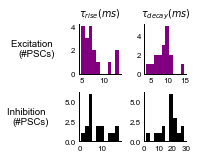

In [66]:
fig, ax = plt.subplots(2,2)

ax[0][0].hist(e_r*1e3,color='purple')
ax[0][1].hist(e_d*1e3,color='purple')
ax[1][0].hist(i_r*1e3,color='k')
ax[1][1].hist(i_d*1e3,color='k')

# ax[0][0].set_xticks([0.01, 0.03])
# ax[0][1].set_xticks([0.01, 0.03])
# ax[1][0].set_xticks([0.02, 0.04])
# ax[1][1].set_xticks([0.04, 0.06])

# ax[0][0].set_yticks([0, 4])
# ax[0][1].set_yticks([0, 4])
# ax[1][0].set_yticks([0, 5])
# ax[1][1].set_yticks([0, 5])

cols = ['{}'.format(col) for col in ["$\\tau_{rise} (ms)$", "$\\tau_{decay} (ms)$"]]
rows = ['{}'.format(row) for row in ["Excitation \n(#PSCs)", "Inhibition \n(#PSCs)"]]

pad = 8 # in points

for axis, col in zip(ax[0], cols):
    axis.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for axis, row in zip(ax[:,0], rows):
    axis.annotate(row, xy=(0, 0.5), xytext=(-axis.yaxis.labelpad - pad, 0),
                xycoords=axis.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.subplots_adjust(left=0.15, top=0.95)
simpleaxis(ax)
fig.set_figwidth(2)
fig.set_figheight(2)
plt.tight_layout()
dump(fig,file('figures/supplementary/7_time_course_one_cell.pkl','wb'))
plt.show(fig)

In [67]:
print("median = {:.3f}, quartiles = {:.3f}, {:.3f}".format(np.median(e_r), np.percentile(e_r, q=25), np.percentile(e_r, q=75)))
print("median = {:.3f}, quartiles = {:.3f}, {:.3f}".format(np.median(e_d), np.percentile(e_d, q=25), np.percentile(e_d, q=75)))
print("median = {:.3f}, quartiles = {:.3f}, {:.3f}".format(np.median(i_r), np.percentile(i_r, q=25), np.percentile(i_r, q=75)))
print("median = {:.3f}, quartiles = {:.3f}, {:.3f}".format(np.median(i_d), np.percentile(i_d, q=25), np.percentile(i_d, q=75)))

median = 0.007, quartiles = 0.006, 0.008
median = 0.009, quartiles = 0.007, 0.010
median = 0.005, quartiles = 0.004, 0.011
median = 0.019, quartiles = 0.015, 0.022


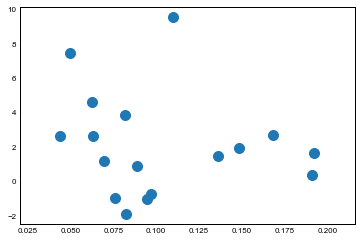

In [68]:
fig, ax = plt.subplots()
ax.scatter(g_e*1e6, del_i*1e3)
plt.show()

### All cells together

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice


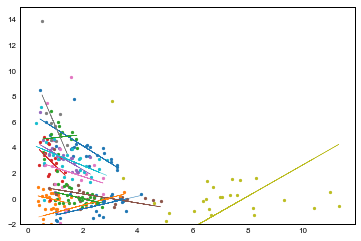

In [85]:
sample_neurons = neurons
conductanceConversion = 70e-3 ## To divide by -70 mV gives conductace from currents.
fig, ax = plt.subplots()
for index, n in enumerate(sample_neurons):
    e_r, e_d, i_r, i_d, g_e, g_i, del_i = [], [], [], [], [], [], []
    coord_e_r, coord_e_d, coord_i_r, coord_i_d, coord_g_e, coord_g_i, coord_e_t_0, coord_i_t_0 = {}, {}, {}, {}, {}, {}, {}, {}
    for expType, experiment in n:
        if expType == 1:
            for sqr in experiment:
                for coord in experiment[sqr].coordwise:
                    coord_e_r[coord] = []
                    coord_e_d[coord] = []
                    coord_g_e[coord] = []
                    coord_e_t_0[coord] = []
                    for trial in experiment[sqr].coordwise[coord].trials:
                        if hasattr(trial, 'fit'):
                            if not trial.fit == None:
#                                 e_r.append(trial.fit['tOn'].value)
#                                 e_d.append(trial.fit['tOff'].value)
#                                 g_e.append(trial.fit['g_max'].value)
                                coord_e_r[coord].append(trial.fit['tOn'].value)
                                coord_e_d[coord].append(trial.fit['tOff'].value)
                                coord_g_e[coord].append(trial.fit['g_max'].value)
                                coord_e_t_0[coord].append(trial.fit['t_0'].value)
                    coord_e_r[coord] = np.nanmean(coord_e_r[coord])
                    coord_e_d[coord] = np.nanmean(coord_e_d[coord])
                    coord_g_e[coord] = np.nanmean(coord_g_e[coord])
                    coord_e_t_0[coord] = np.nanmean(coord_e_t_0[coord])
        if expType == 2:
            for sqr in experiment:
                for coord in experiment[sqr].coordwise:
                    coord_i_r[coord] = []
                    coord_i_d[coord] = []
                    coord_g_i[coord] = []
                    coord_i_t_0[coord] = []
                    for trial in experiment[sqr].coordwise[coord].trials:
                        if hasattr(trial, 'fit'):
                            if not trial.fit == None:
#                                 i_r.append(trial.fit['tOn'].value)
#                                 i_d.append(trial.fit['tOff'].value)
#                                 g_i.append(trial.fit['g_max'].value)
                                coord_i_r[coord].append(trial.fit['tOn'].value)
                                coord_i_d[coord].append(trial.fit['tOff'].value)
                                coord_g_i[coord].append(trial.fit['g_max'].value)
                                coord_i_t_0[coord].append(trial.fit['t_0'].value)
                    coord_i_r[coord] = np.nanmean(coord_i_r[coord])
                    coord_i_d[coord] = np.nanmean(coord_i_d[coord])
                    coord_g_i[coord] = np.nanmean(coord_g_i[coord])
                    coord_i_t_0[coord] = np.nanmean(coord_i_t_0[coord])
        
    for coord in coord_e_r:
        if not any(np.isnan([coord_e_r[coord],coord_e_d[coord],coord_i_r[coord],coord_i_d[coord],coord_g_e[coord],coord_g_i[coord],coord_e_t_0[coord],coord_i_t_0[coord]])):
            e_r.append(coord_e_r[coord])
            e_d.append(coord_e_d[coord])
            i_r.append(coord_i_r[coord])
            i_d.append(coord_i_d[coord])
            g_e.append(coord_g_e[coord]/conductanceConversion)
            g_i.append(coord_g_i[coord]/conductanceConversion)
            del_i.append(coord_i_t_0[coord] - coord_e_t_0[coord])
    
    e_r, e_d, i_r, i_d, g_e, g_i, del_i = [np.array(x) for x in [e_r, e_d, i_r, i_d, g_e, g_i, del_i]]
    g_e*=1e6 # Conductance conversion
    del_i*=1e3 # Delay conversion
    ax.scatter(g_e, del_i,s=5)
    slope,intercept,rval,pval,stderr = ss.linregress(g_e, del_i)
    ax.plot(g_e, slope* g_e + intercept)
plt.ylim((-2.,15))               
plt.show()

***
# Stuff not being used

## Same thing with averaged out and paired responses, and removing points above 2 mV in GABAzine

In [24]:
def figure6(feature=0,square=1,cutoff=30):
    ''' Looking at the one square distribution for GABAzine and Control coordwise'''
    control_vmax = []
    gabazine_vmax = []
    
    for neuron in neuronList:
        if len(neuron.experiment)>1:
            try:
                control_coords = neuron.experiment["Control"][square].coordwise
                gabazine_coords = neuron.experiment["GABAzine"][square].coordwise
                for coord in list(set(control_coords) & set(gabazine_coords)):
                    try:
                        if control_coords[coord].average_feature[feature] and gabazine_coords[coord].average_feature[feature]:
                            control_vmax.append(control_coords[coord].average_feature[feature])
                            gabazine_vmax.append(gabazine_coords[coord].average_feature[feature])
                    except:
                        print ("coord didn't work", coord)
            except:
                square, ("square wasn't there")
    
    control_vmax, gabazine_vmax = np.array(control_vmax), np.array(gabazine_vmax)
    idx = np.argsort(gabazine_vmax)
    print ("Control v_max is larger for {} points".format(len(np.where(control_vmax>2)[0])))
    control_vmax, gabazine_vmax = control_vmax[idx], gabazine_vmax[idx]
    print (len(control_vmax))
    # Picking a fraction
    
    p = np.poly1d(np.polyfit(range(len(control_vmax)), control_vmax, 2))
                  
    maxVmax = cutoff
    maxVmax_index = np.where(gabazine_vmax>maxVmax)[0][0]
    
    plt.plot(control_vmax,'.', label="Control")
    plt.plot(gabazine_vmax,'.', label="GABAzine")
    plt.hlines(maxVmax, 0, len(control_vmax),linestyles='--')
    plt.plot(range(len(control_vmax)), p(range(len(control_vmax))), label="polynomial fit")
    plt.legend()
    plt.show()
    
    #maxVmax_index = 652
    print( maxVmax_index)
    alpha = 1.0
    control_vmax, gabazine_vmax = control_vmax[:maxVmax_index], gabazine_vmax[:maxVmax_index]
    
    print( len(control_vmax))
    
    bins = np.linspace(-0.5, 10.0, 42)
    plt.hist(control_vmax, bins=bins, label="Control", alpha=alpha, cumulative=True, histtype='step')
    plt.hist(gabazine_vmax, bins=bins, label="GABAzine", alpha=alpha, cumulative=True, histtype='step')
    plt.title("Comparing one square distributions for Control and GABAzine")
    plt.xlabel("$V_{max}$")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    
    plt.hist(control_vmax/gabazine_vmax, bins=bins, label="Control/GABAzine", alpha=0.2)
    plt.vlines(1, 0,130)
    plt.title("Control/GABAzine")
    plt.xlabel("$V_{max}$")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    
    slope, intercept, r_value, p_value, std_err = ss.linregress(control_vmax, gabazine_vmax)
    control_range = np.linspace(np.min(control_vmax), np.max(control_vmax), 100)
    plt.scatter(control_vmax, gabazine_vmax, c=np.log(control_vmax/gabazine_vmax))
    plt.plot(control_range, control_range*slope + intercept, label="${:.1f}*x + {:.1f}, r^2= {:0.2f} $".format(slope, intercept, r_value))
    plt.xlim((-0.5,9))
    plt.ylim((-0.5,9))
    plt.xlabel("Control")
    plt.ylabel("GABAzine")
    plt.colorbar()
    plt.legend()
    plt.show()
    
    print( ss.ttest_rel(control_vmax, gabazine_vmax))
    
    d,pval = ss.ks_2samp(control_vmax, gabazine_vmax)
    print (d, pval)

Control v_max is larger for 60 points
441


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater


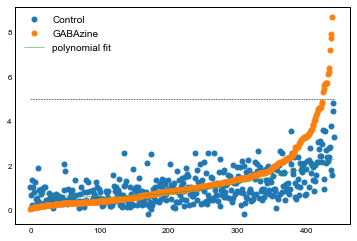

424
424


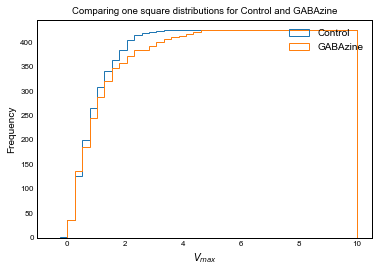

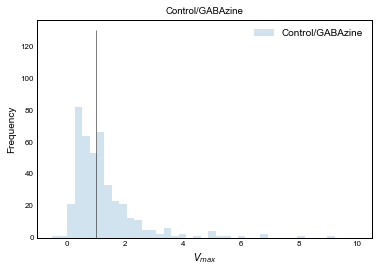

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in log


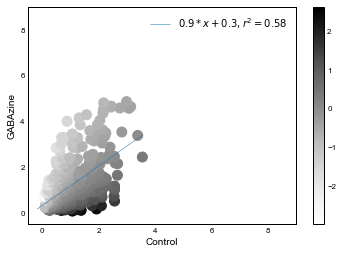

Ttest_relResult(statistic=-4.6432476919675985, pvalue=4.5843115065217777e-06)
(0.08254716981132082, 0.10571652277278028)
Control v_max is larger for 23 points
48


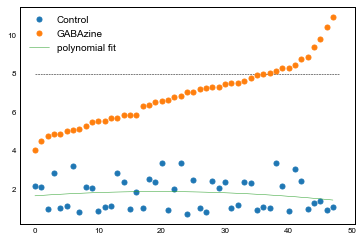

37
37


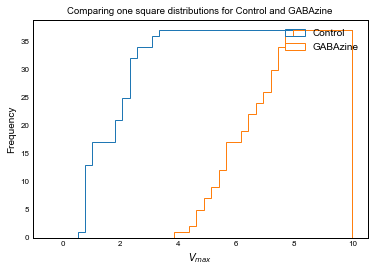

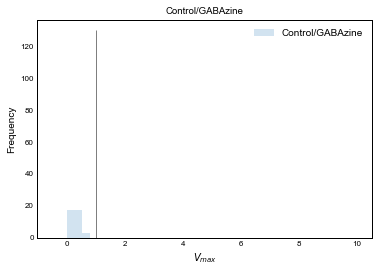

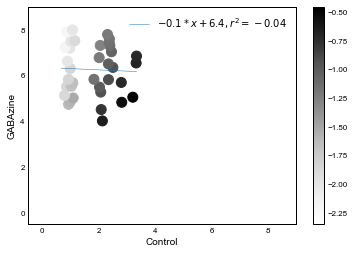

Ttest_relResult(statistic=-19.623179395486119, pvalue=8.2073182390971487e-21)
(1.0, 1.336630424722758e-17)


In [25]:
figure6(square=1,cutoff=5)
figure6(square=9, cutoff=8)

## Testing

In [26]:
from sklearn.metrics import mutual_info_score

def calc_MI(x, y, bins=50): # Just to start with.
    c_xy = np.histogram2d(x, y)[0] # , bins
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

def figure4():
    ''' Mutual information between the time to spike and expected excitation '''
    mut_OE = []
    mut_TE = []
    ratio = []
    numNeurons = 0
    for neuron in neuronList:
        expected = []
        observed = []
        time_peak = []
        for experiment in neuron.experiment:
            if experiment == "Control":            
                for numSq in neuron.experiment[experiment]:
                    if numSq>1:
                        numNeurons+=1
                        coordwise = neuron.experiment[experiment][numSq].coordwise
                        for coord in coordwise:
                            for trial in coordwise[coord].trials:
                                try:
                                    if len(coordwise[coord].trials)>1:
                                            expected.append(coordwise[coord].expected_feature[0])
                                            observed.append(trial.feature[0])
                                            time_peak.append(trial.feature[3])
                                    else:
                                        print len(coordwise[coord].trials)
                                except:
                                    pass
        if len(observed) and len(expected) and len(time_peak):
            mut_OE.append(calc_MI(observed, expected))
            mut_TE.append(calc_MI(time_peak, expected))
            ratio.append(mut_OE[-1]/mut_TE[-1])
            print ratio[-1]
    #plt.hist(mut_OE)
    #plt.hist(mut_TE)
    plt.hist(ratio)
    plt.show()

In [27]:
547/651.

0.8402457757296466

### Range expansion rationale

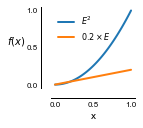

In [29]:
x_range = np.linspace(0,1,100)
fig, ax = plt.subplots()
ax.plot(x_range, np.square(x_range), label="$E^2$",linewidth=2)
ax.plot(x_range, 0.2 * x_range, label="$0.2 \\times E$",linewidth=2)
simpleaxis(ax,outward=True)
ax.set_xlabel("x")
ax.set_ylabel("$f(x)$",rotation=0,labelpad=10)
ax.set_xticks([0,0.5,1])
ax.set_yticks([0,0.5,1])
fig.set_figwidth(1.5)
fig.set_figheight(1.5)
plt.legend(fontsize=8)
dump(fig,file('figures/supplementary/s5_range_expansion_rationale.pkl','wb'))
plt.show(fig)